# Overview

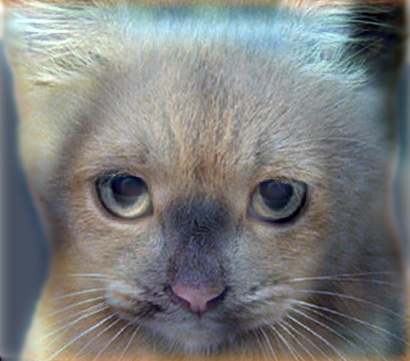

(Does this look like the same animal from closeup and far away?)

The goal of this assignment is to write an image filtering function and use it to create hybrid images using a simplified version of the SIGGRAPH 2006 [paper](https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf) by Oliva, Torralba, and Schyns. Hybrid images are static images that change in interpretation as a function of the viewing distance. The basic idea is that high frequency tends to dominate perception when it is available, but, at a distance, only the low frequency (smooth) part of the signal can be seen. By blending the high-frequency portion of one image with the low-frequency portion of another, you get a hybrid image that leads to different interpretations at different distances.

# Details

This project is intended to familiarize you with image filtering. Once you understand the basic tools for loading, manipulating, and filtering images, it is relatively straightforward to construct hybrid images.

**Image Filtering**. Image filtering (or convolution) is a fundamental image processing tool. See chapter 3.2 of Szeliski and the lecture materials to learn about image filtering (specifically linear filtering). MATLAB and Python have numerous built-in and efficient functions to perform image filtering (try searching for imfilter or conv2d or convolve and fspecial).

**Hybrid Images**. A hybrid image is the sum of a low-pass filtered version of the one image and a high-pass filtered version of a second image. There is a free parameter, which can be tuned for each image pair, which controls how much high frequency to remove from the first image and how much low frequency to leave in the second image. This is called the "cutoff-frequency". In the paper, it is suggested to use two cutoff frequencies (one tuned for each image) and you are free to try that, as well.

We provide you with [5 pairs of aligned images](https://wustl.instructure.com/courses/100902/files/5707876/download?wrap=1) which you must merge to construct hybrid images (these should all work reasonably well for some cut-off frequency). The alignment is important because it affects the perceptual grouping (read the paper for details). In addition, you must create at least two different examples (e.g. change of expression, morph between different objects, change over time, etc.) using image pairs you find. See their [paper](https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf) for some inspiration.

For the example shown at the top of the page, the two original images look like this:

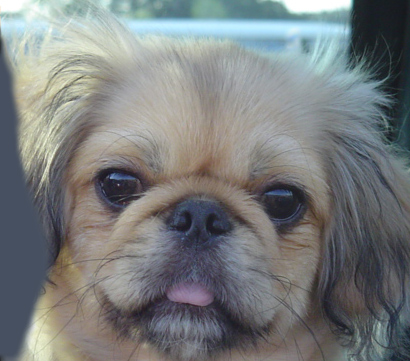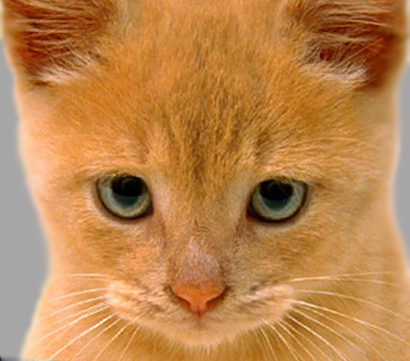

The low-pass (blurred) and high-pass versions of these images look like this:

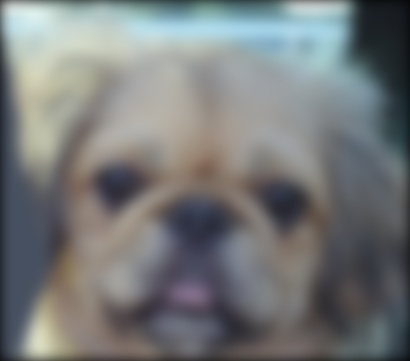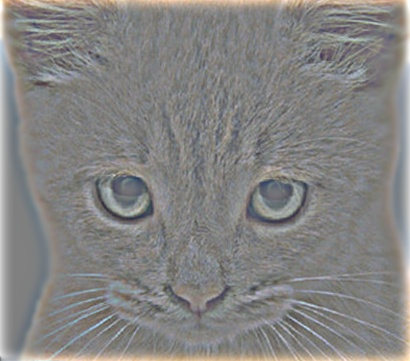

The high-frequency image is actually zero-mean with negative values so it is visualized by adding 0.5. In the resulting visualization, bright values are positive and dark values are negative.

Adding the high and low frequencies together gives you the image at the top of this page. If you're having trouble seeing the multiple interpretations of the image, a useful way to visualize the effect is by progressively downsampling the hybrid image as is done below:

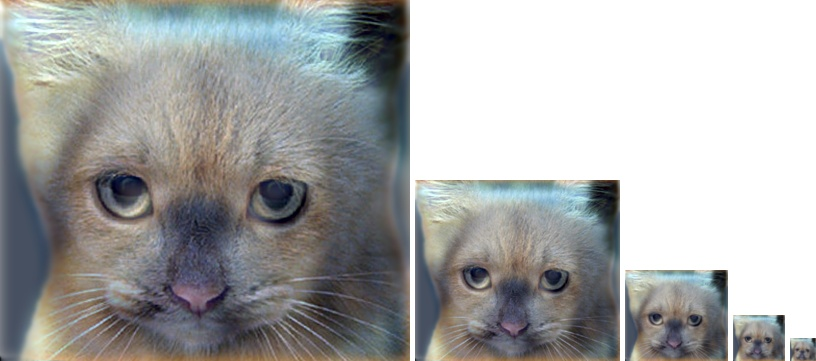

Assuming you have downloaded data and made it ready to be accessed by this notebook, let's proceed to implementing our approach for creating cool hybrid images!

# Implementation
#### **Note**: Unless specified, do not use additional packages or built-in functions for achieving the filtering operations.

In [1]:
# Importing Packages
import numpy as np
from imageio.v2 import imread
from skimage.transform import resize, warp, AffineTransform
import matplotlib.pyplot as plt
from skimage import filters
%matplotlib inline

In [2]:
# Reading Images
def read_image(path):
  img = imread(path)
  return img

One of the commonly used filters in image processing is gaussian kernel. Read the [paper](http://cvcl.mit.edu/publications/OlivaTorralb_Hybrid_Siggraph06.pdf) to learn how gaussian kernels can be used as both high pass filter as well as low pass filter. Making an assumption of $\mu=0$, a 2D-gaussian filter parametrized by σ can be represented by equation below:

G(x, y) = $\frac{1}{2 \pi \sigma^2} exp(-\frac{(x^2+y^2)}{2\sigma^2})$

**Hint**: Try using larger kernel sizes and sigma values.

In [48]:
# Constructing Gaussian Kernel Matrix
def get_gaussian_kernel(ksize=3, mu=0, sigma=1):
  # Code Goes Here:
  #######################################

  # create offset grid if even kernel size
  if ksize % 2 == 0:
    offset = 0.5
  else:
    offset = 0

  # Add offset to coordinate grid
  ax = np.linspace(-(ksize//2) + offset, (ksize//2) + offset, ksize)
  x, y = np.meshgrid(ax, ax)

  # Gaussian Kernel
  gauss_kernel = np.exp(-((x - mu)**2 + (y - mu)**2) / (2 * sigma**2))

  # normalize
  gauss_kernel = gauss_kernel / np.sum(gauss_kernel)

  #######################################
  return gauss_kernel

**Hint**: We expect the output of convolution to be the same size as that of the input. For that, you would need to use padding. For padding, look at the function `numpy.pad`

**Hint**: Filter needs to be applied on each channel separately.

In [49]:
# Convolution Operation
def convolve(img, kernel):
  # Code Goes Here:
  #######################################
  
  # get dimensions
  ksize = kernel.shape[0]

  # define padding (to work with even kernel size)
  pad_total = ksize - 1
  pad_start = pad_total // 2
  pad_end = pad_total - pad_start

  # 2D is passed when convolving img by channel.
  if img.ndim == 2:
        pad_width = ((pad_start, pad_end), (pad_start, pad_end))
  elif img.ndim == 3:
      pad_width = ((pad_start, pad_end), (pad_start, pad_end), (0, 0))

  # pad the image
  img_padded = np.pad(img, pad_width, mode='constant', constant_values=0)

  # convolve image and store in array. Should function for both 2d and 3d array
  colvolved_shape = (img.shape[0], img.shape[1]) if img.ndim == 2 else img.shape
  convolved_img = np.zeros(colvolved_shape)
  for i in range(colvolved_shape[0]):
        for j in range(colvolved_shape[1]):
            intermed = img_padded[i:i+ksize, j:j+ksize]
            if img.ndim == 3:  
                convolved_img[i, j] = np.sum(intermed * kernel[:, :, np.newaxis], axis=(0, 1))
            else:  # 2D
                convolved_img[i, j] = np.sum(intermed * kernel)

  #######################################
  return convolved_img

**Visualize the effect of convolving images**

In [50]:
# Provide path for pair of images
path11 = "1b.bmp"
path21 = "1a.bmp"
path12 = "2b.bmp"
path22 = "2a.bmp"
path13 = "3b.bmp"
path23 = "3a.bmp"
path14 = "4b.bmp"
path24 = "4a.bmp"
path15 = "5b.bmp"
path25 = "5a.bmp"

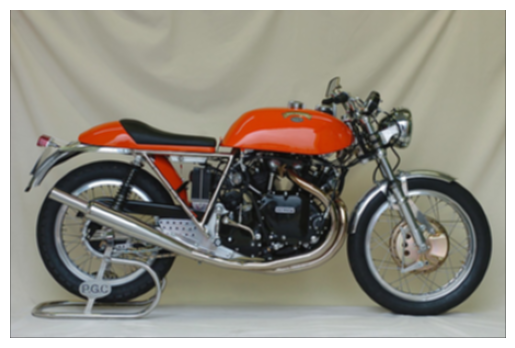

In [51]:
# Visualize a convolved image
def plot_conv_img(img, ksize=3, mu=0, sigma=1):
  img = img / 255
  gauss_kernel = get_gaussian_kernel(ksize,mu,sigma)
  cnv_img = convolve(img, gauss_kernel)
  plt.imshow(np.clip(cnv_img,a_min=0,a_max=1))
  plt.axis('off')
  plt.show()

ksize=3; mu=0; sigma=1
path = path11

img = read_image(path)
plot_conv_img(img, ksize, mu, sigma)

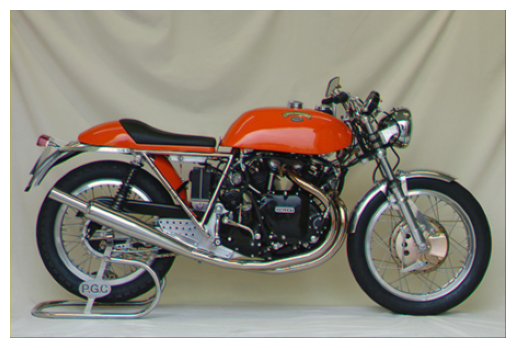

In [ ]:
# Convolve an image differently across each channel
# before recombining back into one image and visualizing
def conv_img_by_channel(img, ksizes=[1,2,3], mus=[0,0,0], sigmas=[1,2,3]):
  # Code Goes Here:
  #######################################
  channels = [img[:, :, i] for i in range(3)]
  convolved_channels = []
  
  for i in range(3):
      kernel = get_gaussian_kernel(ksizes[i], mus[i], sigmas[i])
      conv_channel = convolve(channels[i], kernel)
      convolved_channels.append(conv_channel)
  
  cnv_img =  np.stack(convolved_channels, axis=-1)
  #######################################
  return cnv_img

def plot_conv_img_by_channel(img, ksizes=[1,2,3], mus=[0,0,0], sigmas=[1,2,3]):
  img = img / 255
  cnv_img = conv_img_by_channel(img, ksizes, mus, sigmas)
  plt.imshow(np.clip(cnv_img,a_min=0,a_max=1))
  plt.axis('off')
  plt.show()

ksizes=[1,2,3]; mus=[0,0,0]; sigmas=[1,2,3]
path = path11

img = read_image(path)
plot_conv_img_by_channel(img, ksizes, mus, sigmas)

In [188]:
# Implement high pass filter and get edges of image
def hpf_filter(img, kernel):
  # Code Goes Here:
  #######################################
  img = img.astype(np.float32)
  
  lpf_img = convolve(img, kernel)
  hpf_img = img - lpf_img

  #######################################
  return hpf_img


In [189]:
# Implement lower pass filter and get blurred image
def lpf_filter(img, kernel):
  # Code Goes Here:
  #######################################
  lpf_img = convolve(img, kernel)

  #######################################
  return lpf_img

In [190]:
def plot_img(img_1, img_2):
    # Plot the images side by side
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    axes[0].imshow(np.clip(img_1,a_min=0,a_max=1))
    axes[0].axis('off')
    axes[0].set_title('Blurred Image')

    axes[1].imshow(np.clip(img_2,a_min=0,a_max=1))
    axes[1].axis('off')
    axes[1].set_title('Edge Image')

In [191]:
# Plot resized images
def plot_resize_imgs(img):
  fig, axs = plt.subplots(1, 5, figsize=(15, 10), gridspec_kw={'width_ratios':[20, 15, 10, 5, 1]})
  fig.tight_layout()
  for i in range(5):
    axs[i].imshow(np.clip(img,a_min=0,a_max=1))
    axs[i].axis('off')
  plt.show()

In [202]:
# Compute hybrid image from 2 given images using your functions
def get_hybrid_img_base(im1, im2, ksize=3, mu=0, sigma=1):
  # Code Goes Here:
  #######################################
  # Generate Gaussian kernel
  kernel = get_gaussian_kernel(ksize, mu, sigma)
  
  # Create low-frequency (blurred) version of first image
  blurred_img = lpf_filter(im1, kernel)
  
  # Create high-frequency (edge) version of second image
  edge_img = hpf_filter(im2, kernel)
  
  # Combine images to create hybrid image"
  hybrid_img = blurred_img + edge_img

  #######################################
  plot_img(blurred_img, edge_img+0.5)
  # plot_img(edge_img+0.5, "Edge Image")
  return hybrid_img

<!-- BEGIN QUESTION -->



In [228]:
# Hybrid Image generated using built-in functions
# Use skimage, scipy or opencv functions to use built in function for filters
# Note: depending on function choice, you may not use some of the gaussian kernel parameters—this is OK
def get_hybrid_img(im1, im2, ksize=3, mu=0, sigma=1):
  #Code Goes Here:
  #######################################
  
  # Apply Gaussian blur using scikit-image
  blurred_img = filters.gaussian(
      im1, 
      sigma=sigma, 
      mode='reflect', 
      channel_axis=-1
  )
  
  # Create high-pass version using library functions
  lpf_im2 = filters.gaussian(
      im2,
      sigma=sigma,
      mode='reflect',
      channel_axis=-1
  )

  edge_img = im2 - lpf_im2
    
  # Combine images and normalize
  hybrid_img = blurred_img + edge_img

  #######################################
  plot_img(blurred_img, edge_img+0.5)
  # plot_img(edge_img + 0.5, "Edge img")
  return hybrid_img

<!-- END QUESTION -->



In [229]:
# Main Function
def main(path1, path2, filter_type='baseline', ksize=3, mu=0, sigma=1):

  im1 = imread(path1) / 255
  im2 = imread(path2) / 255
  if filter_type == 'baseline':
    hybrid_img = get_hybrid_img_base(im1, im2, ksize=ksize, mu=mu, sigma=sigma)
  else:
    hybrid_img = get_hybrid_img(im1, im2, ksize=ksize, mu=mu, sigma=sigma)
  plot_resize_imgs(hybrid_img)

### Comparing the hybrid images generated through built-in functions and the functions you wrote

In [230]:
# Provide path for pair of images
path11 = "1b.bmp"
path21 = "1a.bmp"
path12 = "2b.bmp"
path22 = "2a.bmp"
path13 = "3b.bmp"
path23 = "3a.bmp"
path14 = "4b.bmp"
path24 = "4a.bmp"
path15 = "5b.bmp"
path25 = "5a.bmp"

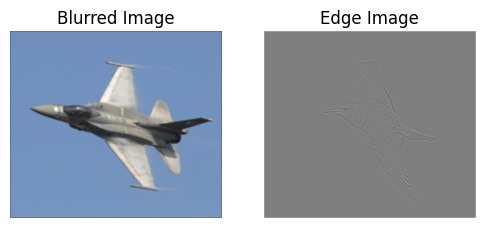

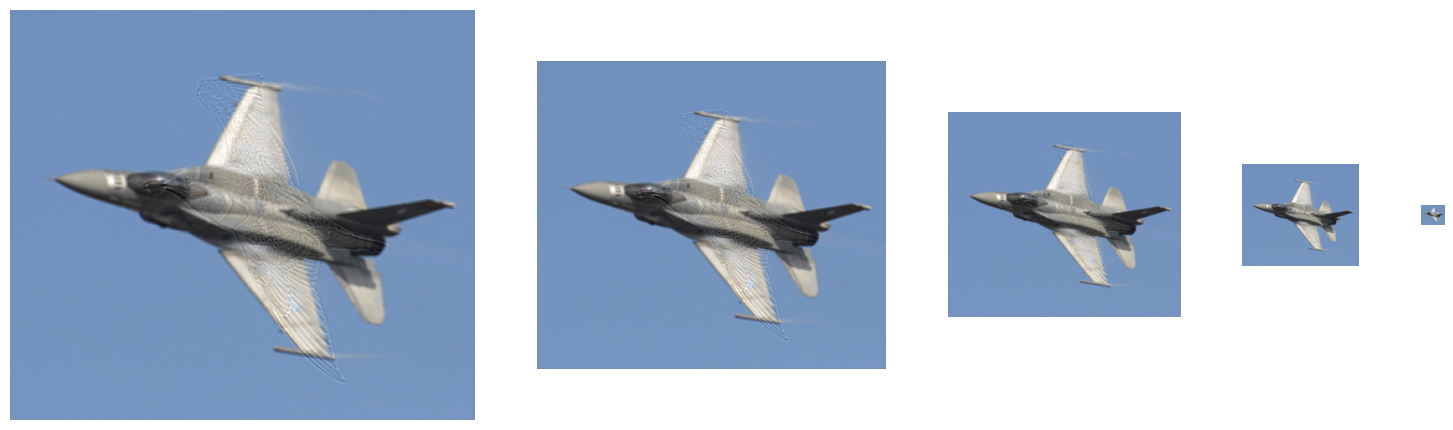

In [231]:
ksize=3; mu=0; sigma=3
main(path12, path22, 'baseline', ksize=ksize, mu=mu, sigma=sigma)

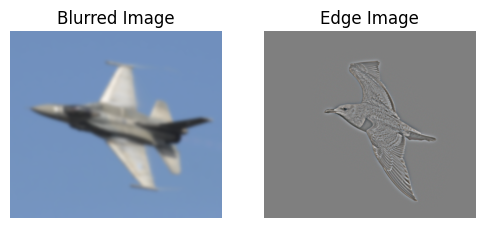

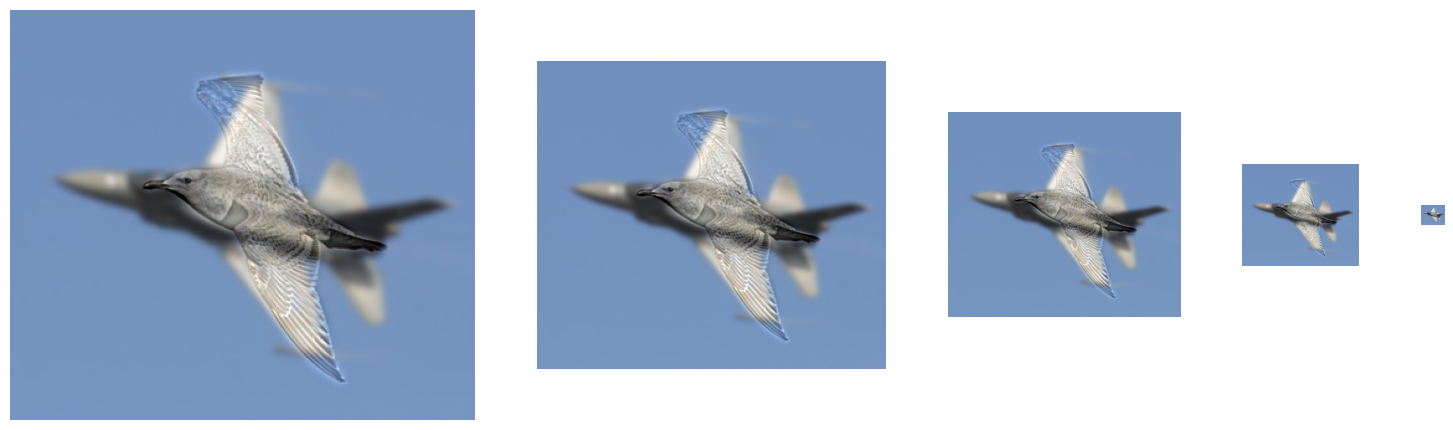

In [232]:
ksize=3; mu=0; sigma=3
main(path12, path22, 'nobaseline', ksize=ksize, mu=mu, sigma=sigma)

### Transforming image alignment to improve hybrid images

Here, you will be using skimage to scale, rotate, and translate one of the two images used for creating hybrid images to get better alignment.
**Hint**: you should use [AffineTransform](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.AffineTransform) and [warp](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.warp).

In [233]:
# transform an image
def transform_image(img, scale=1, rotation=0, translation=[0,0]):
  # Code Goes Here:
  #######################################
  transform = AffineTransform(scale=(scale, scale), rotation=np.deg2rad(rotation), translation=translation)
  transformed_img = warp(img, transform, mode='constant', cval=0)  # Using constant padding value of 0

  #######################################
  return transformed_img


In [234]:
# Main Function with transformed image 1
def main_transform(path1, path2, filter_type='baseline', ksize=3, mu=0, sigma=1, scale=1, rotation=0, translation=[0,0]):
  im1 = imread(path1) / 255
  im2 = imread(path2) / 255
  im1 = transform_image(im1, scale=scale, rotation=rotation, translation=translation)
  if filter_type == 'baseline':
    hybrid_img = get_hybrid_img_base(im1, im2, ksize=ksize, mu=mu, sigma=sigma)
  else:
    hybrid_img = get_hybrid_img(im1, im2, ksize=ksize, mu=mu, sigma=sigma)
  plot_resize_imgs(hybrid_img)

Now, explore creating hybrid images again while changing their alignment.


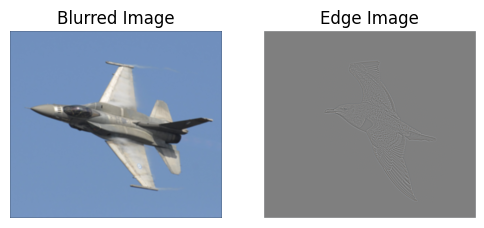

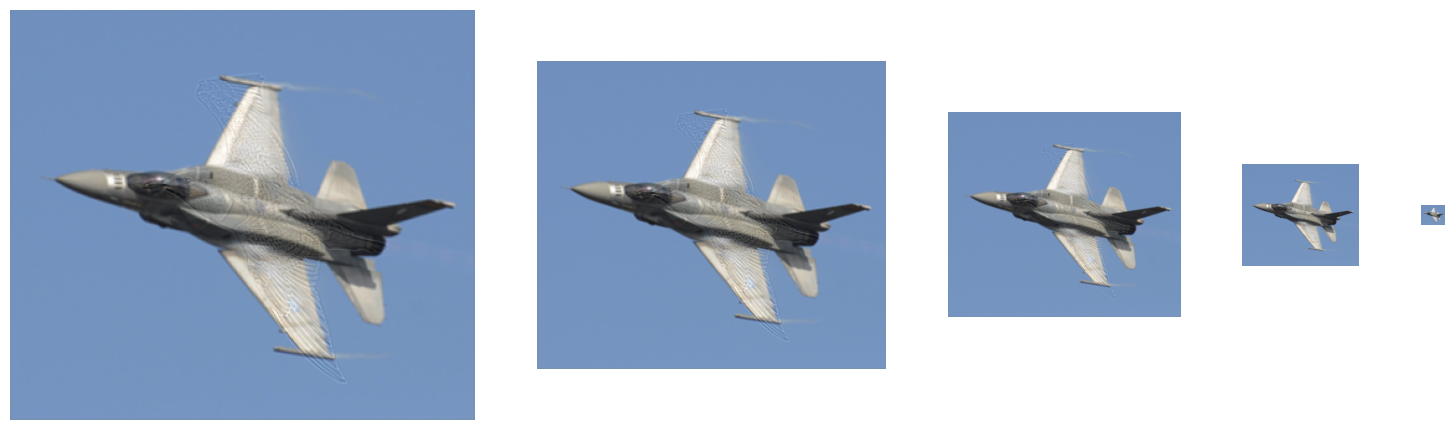

In [235]:
scale=1; rotation=0; translation=[0,0]
ksize=3; mu=0; sigma=1
main_transform(path12, path22, 'baseline',
     ksize=ksize, mu=mu, sigma=sigma,
     scale=scale, rotation=rotation, translation=translation
)

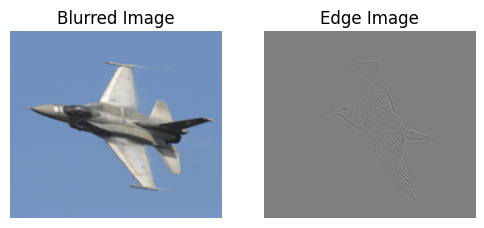

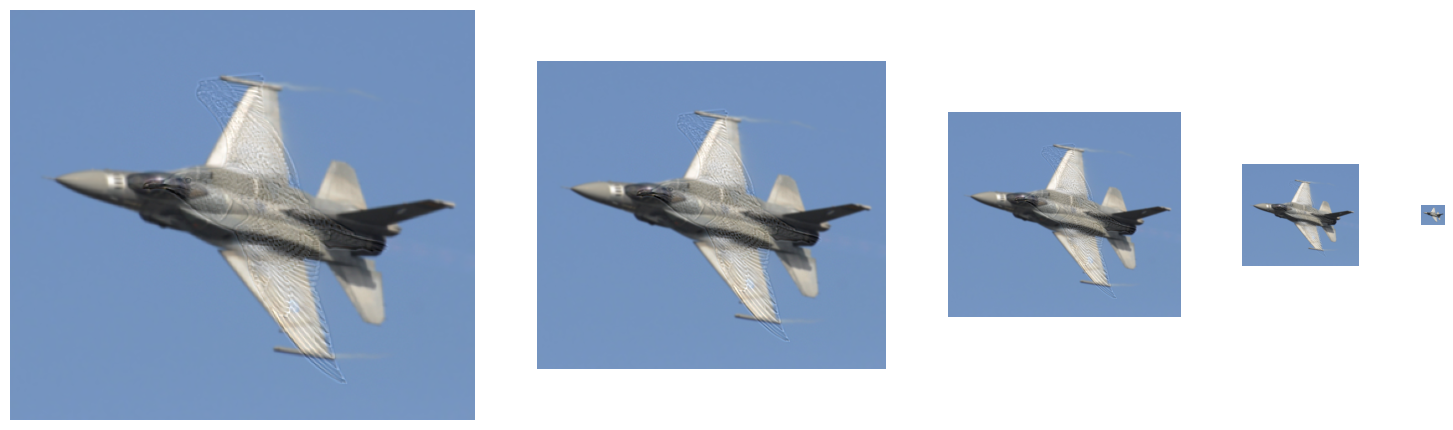

In [236]:
scale=1; rotation=0; translation=[0,0]
ksize=3; mu=0; sigma=1
main_transform(path12, path22, 'nobaseline',
     ksize=ksize, mu=mu, sigma=sigma,
     scale=scale, rotation=rotation, translation=translation
)

# Discussion

Use your judgement to add relevent text/code cells to provide a discussion of your implementation.

<!-- BEGIN QUESTION -->

1. Describe the effects of convolving your images; how do they change?  How does convolving each channel differently affect the image?

_Points:_ 4

_Colvolving an image applies spatial filters to alter the pixel values of the images. These manipulations change the values based on local neighborhoods of pixels. Some of examples of change are:
- Gaussian kernel filter -- creates a blurring effect, reducing the high-frequency details of an image. This is seen in the plane visualization.
- Edge detection -- by applying kernels that highlight edges (vertically or horizontally) the image transforms into a visualization of the edges of the objects in the image, as seen in the bird hybrid-image visualizations.

When convolving the channels differently, channel-specific enhancements occur. If we look at the pictures of motocycles, we can see that the channel convolution creates a warmer, slightly sharper image._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

2. Describe your overall algorithm and any decisions you made to write your algorithm a particular way.

_Points:_ 4

_The hybrid image algorithm generally works by combining high-frequency and low-frequency images. The blurring creates a low frequency image, and the edge detection creates a high frequency counterpart. I found that normalization of the edge detector was important in creating more significant differences in the edges. The algorithm itself was just taking the image and subtracting the convolved (low-frequency) version of the same image._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

3. Make sure you show the results of filtering for different scales of Gaussian filters and for different transforms, and show some of the intermediate images in the hybrid image pipeline (e.g. the low and high-frequency images). Also, discuss anything extra you did. Feel free to add any other information you feel is relevant.

_Points:_ 4

_ Different scales create the illusion of zooming in to the image of the plane. Rotation begins to rotate the plane, disconnecting the overlaps of the two images. The optical illusion effect starts to go away as transformations are made only to one of the two sets of images._

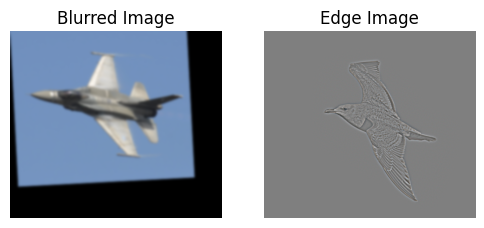

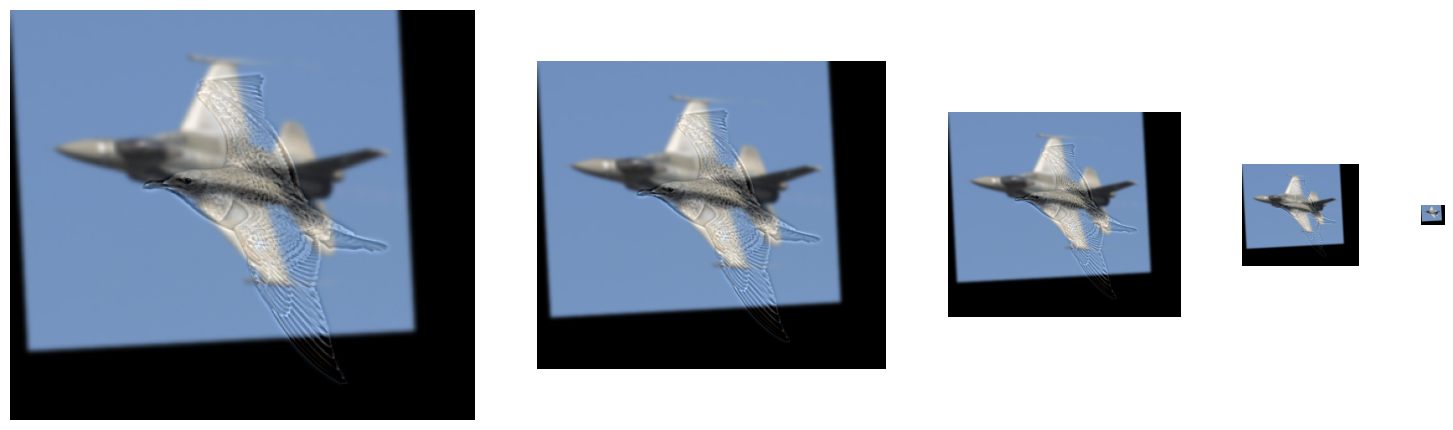

In [238]:
scale=1.2; rotation=3; translation=[0,0]
ksize=3; mu=0; sigma=2
main_transform(path12, path22, 'nobaseline',
     ksize=ksize, mu=mu, sigma=sigma,
     scale=scale, rotation=rotation, translation=translation
)

<!-- END QUESTION -->

# Suggestions/Comments

1. The filtering function will likely have several options for how to handle the edge of the image.  Try them and see which one works the best.  Include your choice in your discussion.

2. When constructing a Gaussian filter, make sure that the kernel is large enough.  If your kernel size is too small for the variance of your Gaussian, then it will behave like a Gaussian filter with a lower variance.
The default approach (construct a filter kernel then convolve the image) is actually suboptimal for the Gaussian filter.  One issue is that the Gaussian kernel is separable, so you can actually do two 1D convolutions (which ends up being faster).

3. If you really want to understand how the filtering process is working, implement a simple image filtering function.  It should accept as input an RGB image and a 2D kernel.  You can pad the image with zeros (look for a built-in function) and apply the kernel with a set of nested loops.  This will likely be much slower than the built-in implementation, but you will learn a lot about the painful details of getting it just right.

4. Debugging: In case you feel like things are not working as they should, general suggestions are: check for shape of arrays, and try on really simple kernel and dummy input for which you know how the output should look like.

5. Generating pdf: Run `main` function in seperate code blocks for different images. This will help with the issue of dissapering images when generating pdf. Change the paper size when printing to A3 (or whichever works best for your case) before exporting to pdf.

# Submission Guide
Follow [this canvas page](https://wustl.instructure.com/courses/100902/pages/homework-submission-workflow) for detailed submission guidelines.

Submit both homework01.ipynb  as well it's pdf version homework01.pdf to gradescope.

# Credits
Assignment developed by Nathan Jacobs based on a similar project by James Hays, which was based on a similar project by Derek Hoiem.

# AI Usage Summary

[as per course policy, we allow the use of AI assistants as part of completing homework assignments, however such usage must be acknowledged. If it is detected and not acknowledged, it will be considered a violation of academic integrity. As such, please summarize what AI tools you used to complete this assignment, including for understanding the concepts and generating source code. If you used code generation, please explain the extent to which you had to modify the solution for it to function correctly.]

Used github copilot to help with some inner code on a few functions.